In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

In [4]:
start = "2017-1-1" #datetime(2017, 1, 1)
symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE']

In [5]:
symbols=[]
yf.pdr_override()
#pull price using iex for each symbol in list defined above
for ticker in symbols_list:
    # Download market data from yahoo
    r = pdr.get_data_yahoo(ticker, start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
    
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Close,Symbol
0,2017-01-03 00:00:00-05:00,29.037500,AAPL
1,2017-01-04 00:00:00-05:00,29.004999,AAPL
2,2017-01-05 00:00:00-05:00,29.152500,AAPL
3,2017-01-06 00:00:00-05:00,29.477501,AAPL
4,2017-01-09 00:00:00-05:00,29.747499,AAPL


In [6]:
df['Symbol'].unique()

array(['AAPL', 'F', 'TWTR', 'AAL', 'AMZN', 'GOOGL', 'GE'], dtype=object)

<AxesSubplot:>

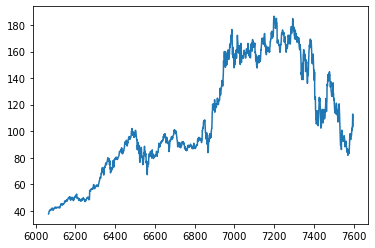

In [7]:
df[df['Symbol']=='AMZN']['Close'].plot()

## Multivariate TS Analysis

It is important to know how the markets are interrelated. Also, for investors holding multiple assets, the dynamic relationships between returns of the asses is important in decision making. Let ${\bf r}_{t} = (r_{1t}, ... r_{kt})$ be the log returns of k assets at time t.

### Weak Stationarity and Cross-Correlation Matrices

Consider ${\bf r}_{t}$. ${\bf r}_{t}$ is weakly stationary if the first and second moments are time-invariant. In particular the mean vector and covariance matrix of a weakly stationary series are constant over time.

For ${\bf r}_{t}$, we define its mean vector and covariance matrix as ${\bf \mu} = E({\bf r}_{t})$ and ${\bf \Gamma}_{0} = E[({\bf r}_{t} - {\bf \mu})({\bf r}_{t} - {\bf \mu})']$. ${\mu}$ is a k-dimensional vector, ${\bf \Gamma}_{0}$ is a $k \times k$ matrix. The $i-th$ diagonal element is of ${\bf \Gamma}_{0}$ is the variance of $r_{it}$, whereas the $(i, j)th$ element is the covariance between $r_{it}$ and $r_{jt}$

Let $D$ be $k \times k$ diagonal matrix consisting of the standard deviations of $r_{it}$, so $D = diag\{ \sqrt{\Gamma_{11}(0)}, ..., \sqrt{\Gamma_{kk}(0)} \}$. The concurrent or lag-zero, cross-correlation matrix of ${\bf r}_{t}$ is defined as,

\begin{equation}
{\bf \rho}_{0} = [\rho_{ij}(0)] = D^{-1} {\bf \Gamma}_{0} D^{-1}
\end{equation}

The $(i,j)th$ element of ${\bf \rho}_{0}$ is

\begin{equation}
\rho_{ij}(0) = \frac{Cov(r_{it}, r_{jt})}{std(r_{it})std(jt)}
\end{equation}

The lag-$\ell$ cross-correlation matrix (CCM) of ${\bf r}_{t}$ is 

\begin{equation}
{\bf \rho}_{\ell} = [\rho_{ij}(\lambda)] = D^{-1} {\bf \Gamma}_{\ell} D^{-1}
\end{equation}

### Sample Cross - Correlation Matrices

Given the data $\{{\bf r}_{t} | t = 1, ..., T\}$, the cross - covariance matrix can be estimated as

\begin{equation}
\hat{ \Gamma_{\ell}} = \frac{1}{T} \sum_{t = \ell + 1}^{T}({\bf r}_{t} - \bar{{\bf r}})({\bf r}_{t-\ell} - \bar{{\bf r}})',
\end{equation}
where $\bar{{\bf r}} = (\sum_{t=1}^{T} {\bf r}_{t})/T$ is the vector sample means.

The cross correlation matrix ${\bf \rho}_{\ell}$

\begin{equation}
\hat{{\bf \rho}}_{\ell} = \hat{D}^{-1} \hat{{\bf \Gamma}}_{\ell} \hat{D}^{-1}
\end{equation}